In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap


In [ ]:


# Now load the Excel file from the current directory
df = pd.read_excel('Figure_1A_data.xlsx')

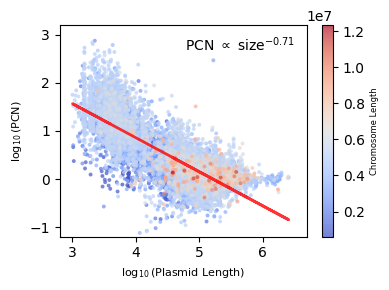

Saved SVG to: /mnt/e/Figure_files/Fig_2/Visualization_2a.svg
Saved PDF to: /mnt/e/Figure_files/Fig_2/Visualization_2a.pdf
Saved TIFF to: /mnt/e/Figure_files/Fig_2/Visualization_2a.tiff


In [ ]:

# Define the columns to plot
x_col = 'Log10_Plasmid_Length'
y_col = 'Log10_PIRACopyNumber'
color_col = 'Total_Chromosome_Length'

# Extract the data for plotting
x = df[x_col].values
y = df[y_col].values
c = df[color_col].values  # We use the raw Chromosome Length values (not log-transformed)

# Sort points by color for layering (smallest first)
idx = np.argsort(c)
x, y, c = x[idx], y[idx], c[idx]

# Calculate regression slope using polyfit
slope, intercept = np.polyfit(x, y, 1)

# Prepare annotation text with the correct theta (regression slope)
annotation_text = (
    rf"PCN $\propto$ size$^{{{slope:.2f}}}$"
)

# Create the plot
plt.figure(figsize=(4, 3))

# Scatter plot with color based on Chromosome Length (raw, not log scale)
sc = plt.scatter(x, y, c=c, s=8, cmap='coolwarm', edgecolors='none', alpha=0.7)

# Add regression line (using the slope from the polyfit)
plt.plot(x, slope * x + intercept, color='red', linewidth=2, alpha=0.8, label='Regression Line')

# Add axis labels
plt.xlabel(r'$\log_{10}$(Plasmid Length)', fontsize=8)
plt.ylabel(r'$\log_{10}$(PCN)', fontsize=8)

# Add a colorbar for the Chromosome Length (raw, not log scale)
cbar = plt.colorbar(sc)
cbar.set_label('Chromosome Length', fontsize=6)

# Add annotation text at the top-right corner (without enclosed box)
plt.text(
    0.95, 0.95, annotation_text,
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    horizontalalignment='right'
)

# Set axis limits and ticks
plt.xlim(2.8, 6.7)
plt.ylim(-1.2, 3.2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove gridlines for a cleaner plot
plt.grid(False)

# Adjust the layout to ensure tight spacing
plt.tight_layout()

# Define the output directory and save paths
output_dir = "/mnt/e/Figure_files/Fig_2"
os.makedirs(output_dir, exist_ok=True)

# Save the figure in high DPI for multiple formats
pdf_path = os.path.join(output_dir, "Figure_1A.pdf")

# Save the plot in high DPI for all formats
plt.savefig(pdf_path, dpi=1200, bbox_inches='tight', facecolor='white')

# Show the plot
plt.show()
